In [19]:
import numpy as np
from collections import defaultdict

In [29]:
import _mysql
import sys

dates = defaultdict(list)
sizes = defaultdict(list)

try:
    con = _mysql.connect('localhost', 'root', 'hougabouga', 'adam')
        
    con.query("SELECT date, SUM(total_length) as size FROM "
              "db_sizes WHERE db_server_id=1 GROUP BY date")
    
    
    result = con.use_result()
    while True:
        t = result.fetch_row()
        if len(t) == 0:
            break
        date, total_length = t[0]
        
        dates[0].append(date)
        sizes[0].append(int(total_length))

except _mysql.Error, e:
  
    print "Error %d: %s" % (e.args[0], e.args[1])
    sys.exit(1)

finally:
    
    if con:
        con.close()

In [30]:
dates

defaultdict(<type 'list'>, {0: ['2015-07-22', '2015-07-23', '2015-07-24', '2015-07-25', '2015-07-26', '2015-07-27', '2015-07-28', '2015-07-29', '2015-07-30', '2015-07-31', '2015-08-01', '2015-08-02', '2015-08-03', '2015-08-04', '2015-08-05', '2015-08-06', '2015-08-07', '2015-08-08', '2015-08-09', '2015-08-10', '2015-08-11', '2015-08-12', '2015-08-13', '2015-08-14']})

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import GPy

/home/mehdi/anaconda/lib/python2.7/site-packages/GPy/util/linalg.py:48: UserWarning: warning: caught this exception:/home/mehdi/anaconda/lib/python2.7/site-packages/numpy/core/_dotblas.so: undefined symbol: dsyrk_
  warnings.warn("warning: caught this exception:" + str(e))
/usr/lib/python2.7/dist-packages/pycuda/reduction.py:153: UserWarning: nvcc said it demoted types in source code it compiled--this is likely not what you want.
  return SourceModule(src, options=options, keep=keep, no_extern_c=True)
/usr/lib/python2.7/dist-packages/pycuda/reduction.py:153: UserWarning: The CUDA compiler suceeded, but said the following:
/usr/lib/python2.7/dist-packages/pycuda/../../../../include/pycuda/pycuda-complex.hpp(555): warning: a __device__ function("pycuda::complex<double>::complex") redeclared without __device__, hence treated as a __host__ __device__ function

ptxas /tmp/tmpxft_00007c86_00000000-5_kernel.ptx, line 84; warning : Double is not supported. Demoting to float

  return SourceMod

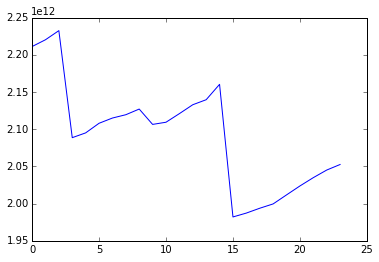

In [147]:
plt.plot(y)

In [132]:
kern = GPy.kern.RBF(input_dim=1, variance=0.1, lengthscale=3)

In [146]:
X = np.arange(len(x))
y = np.array(sizes[0])
#y = np.arange(sizes[0])

In [143]:
model = GPy.models.GPRegression(X[:, np.newaxis], y[:, np.newaxis], kernel=kern)
model.optimize()
model

{'dataplot': [<matplotlib.lines.Line2D at 0xa5cd2cec>],
 'gpplot': [[<matplotlib.lines.Line2D at 0xa5cca66c>],
  [<matplotlib.lines.Line2D at 0xa5cd278c>]]}

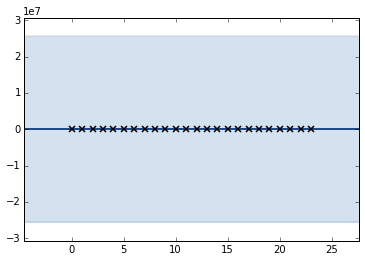

In [144]:
model.plot()